Please download the dataset at [Harvard Dataverse](https://doi.org/10.7910/DVN/OFN15B)

<blockquote style="background-color:#fff8e1; border-left:5px solid #ffeb3b; padding:10px 20px; color:#333; font-style:italic;">
  ⚠️ <strong>Note:</strong> Dataset versions ≤ <strong>2.0</strong> contain only a <strong>10%</strong> sample of the full data.<br>
  As a result, figures derived from these versions may differ from those reported in the paper.
</blockquote>



In [1]:
from figure5 import *

In [2]:
DATA_DIR = '/cta/mofadata/dataset_v1.3'
# countries = get_countries('/cta/mofadata/dataset_v1.2', exclude=['RUS_','UKR_'])

/cta/users/kguray/data_analysis/GlobalDiplomacyNet-Dataset/figures/fig5/figure5.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_dict)


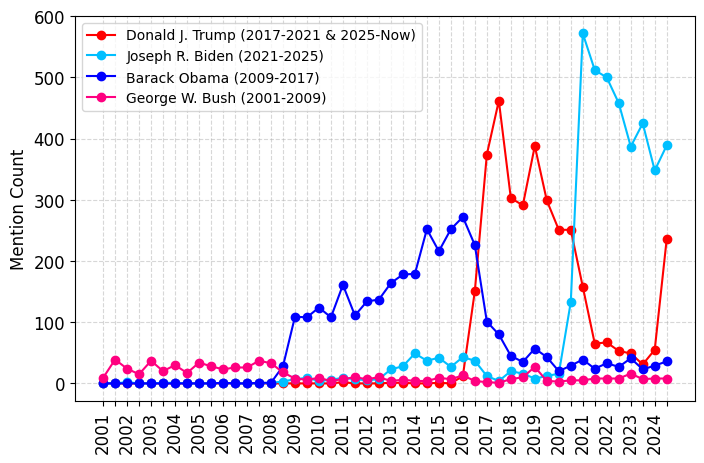

In [3]:

fig, ax= plt.subplots(figsize=(8,5))
plot_trend(entities=[
               ('Q22686','Donald J. Trump (2017-2021 & 2025-Now)','#ff0000'),
               ('Q6279', 'Joseph R. Biden (2021-2025)','#00bfff'),
               ('Q76', 'Barack Obama (2009-2017)',"#0000ff"),
               ('Q207','George W. Bush (2001-2009)', '#ff0080'),
               ],
        countries_to_include= get_countries(DATA_DIR, exclude=['USA_']),
        ax=ax, start_year=2001, end_year=2024, month_frequency=6)

plt.show()

/cta/users/kguray/data_analysis/GlobalDiplomacyNet-Dataset/figures/fig5/figure5.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), **font_dict)


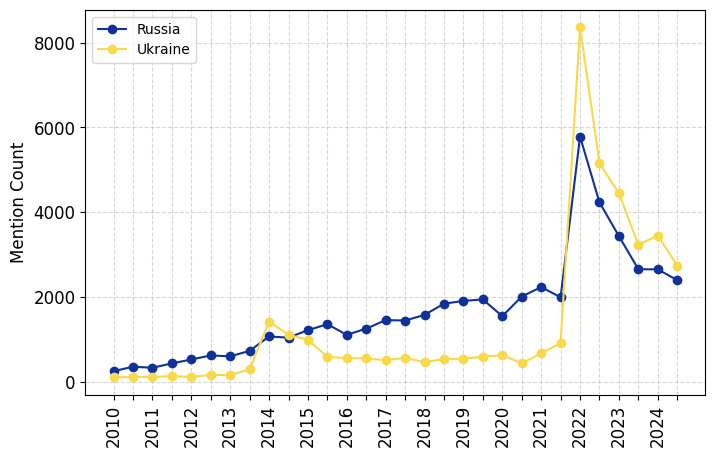

In [3]:
fig, ax= plt.subplots(figsize=(8,5))
plot_trend(
    entities = [
        ('Q159','Russia','#11319A'),
        ('Q212','Ukraine','#f8d949')
    ],
    countries_to_include=get_countries(DATA_DIR, exclude=['RUS_','UKR_']), 
    ax=ax, start_year=2010, end_year=2024, month_frequency=6
    )

In [4]:
g20_iso3 = ["ARG", "AUS", "BRA", "CAN", "CHN", "FRA", "DEU", "IND", "IDN", "ITA", "JPN", "MEX", "RUS", "SAU", "ZAF", "KOR", "TUR", "GBR", "USA"]
org_inputs = [('ASEAN', 'Q7768'), ('AU', 'Q7159'), ('BRICS', 'Q243630'), ('EU', 'Q319328'), ('G20', 'Q19771'), ('G7', 'Q1764511'), ('IAEA', 'Q41984'), ('ICC', 'Q47488'), ('IMF', 'Q129162560'), ('NATO', 'Q7184'), ('OECD', 'Q41550'), ('UN', 'Q1065'), ('WHO', 'Q7817'), ('WTO', 'Q7825'), ('World Bank', 'Q123373597')]

In [6]:
data = get_org_mentions(g20_iso3,org_inputs,DATA_DIR)

100%|██████████| 19/19 [06:44<00:00, 21.29s/it]


this takes too much time to run

In [ ]:
# import pickle
# with open('./data','wb') as f:f.write(pickle.dumps(data))

In [3]:
data = pickle.loads(open('./data','rb').read())

In [5]:
from matplotlib.colors import LogNorm

def plot_org_heatmap_cosmetic(heatmap_values, orgs, ax:Axes, data_directory:str):
    """
    countries should be just ISO3 codes,

    orgs should be: [(label, qid), ]
    
    """
    org_labels, org_qids = list(map(lambda x:x[0],orgs)), list(map(lambda x:x[1],orgs))

    org_order = sorted(org_labels)
    # sorting for better look
    heatmap_values = dict(sorted(map(lambda x:(g20_name_lookup[x[0]],dict(sorted(x[1].items()))),heatmap_values.items())))
    data = np.array(list(map(lambda x:list(x.values()),heatmap_values.values())))
    mask = data==0
    # TODO change labels to full names with a harcoded dict
    labels = list(heatmap_values.keys())
    sns.heatmap(data,yticklabels=labels, xticklabels= org_order, 
                cmap='YlGnBu',square=False,fmt='.1f',annot=True, mask=mask, 
                norm=LogNorm(vmin=1e-1+1e-5, vmax=100), ax=ax)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)



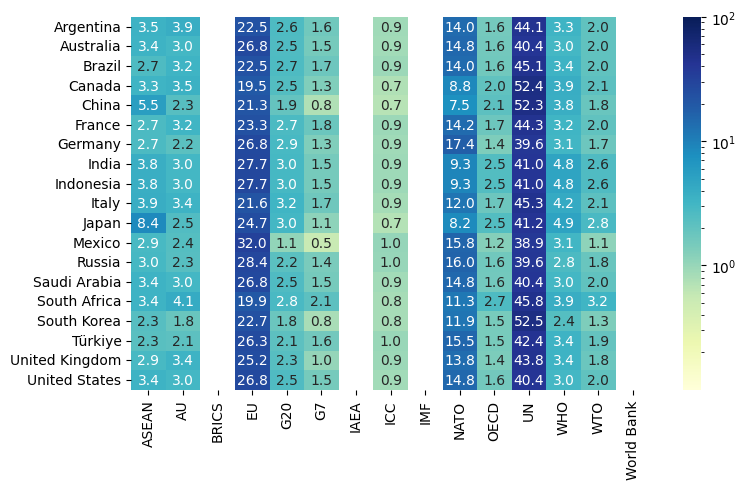

In [6]:
fig, ax= plt.subplots(figsize=(8,5))
plot_org_heatmap_cosmetic(data,org_inputs,ax,DATA_DIR)
plt.tight_layout()
plt.show()